# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def rolling(n):
    rolls = [random.randint(1,6) for i in range(n)]
    return rolls
    
rolling(10)

[2, 3, 3, 2, 2, 4, 2, 1, 4, 4]

#### 2.- Plot the results sorted by value.

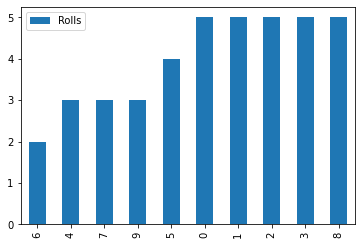

In [3]:
# your code here
df = pd.DataFrame(rolling(10), columns=['Rolls']).sort_values(by='Rolls')
df.plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c42e2d0>]],
      dtype=object)

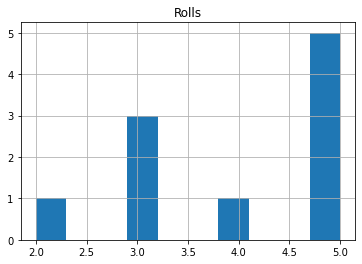

In [4]:
# your code here
df.hist()

In [5]:
"""
your comments here

A histogram is a representation of the distribution of data, so the frequency distribution counts the times
a number appeared after rolling the dice withount taking care of the order,

"""

'\nyour comments here\n\nA histogram is a representation of the distribution of data, so the frequency distribution counts the times\na number appeared after rolling the dice withount taking care of the order,\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
calcMean = lambda x : (sum(x)/len(x))

print(f"Mean: {calcMean(df['Rolls'])}")
df['Rolls'].mean()

Mean: 4.0


4.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
dfFreq = pd.DataFrame(df['Rolls'].value_counts())
dfFreq.columns=['Frequency']
dfFreq

,Frequency
5,5
3,3
4,1
2,1


In [8]:
calcMean(df['Rolls'].value_counts())

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
def calcMedian(x):
    srtLst = sorted(x)
    lstLen = len(x)
    index = (lstLen - 1) // 2

    if (lstLen % 2):
        return srtLst[index]
    else:
        return (srtLst[index] + srtLst[index + 1])/2.0
    
    
calcMedian(df['Rolls'])

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here
q1 = lambda x : sorted(x) [int(len(x) * .25)]
q2 = lambda x : sorted(x) [int(len(x) * .50)]
q3 = lambda x : sorted(x) [int(len(x) * .75)]

print(q1(df['Rolls']))
print(q2(df['Rolls']))
print(q3(df['Rolls']))

3
5
5


In [11]:
df.describe()

,Rolls
count,10.000000
mean,4.000000
std,1.154701
min,2.000000
25%,3.000000
50%,4.500000
75%,5.000000
max,5.000000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

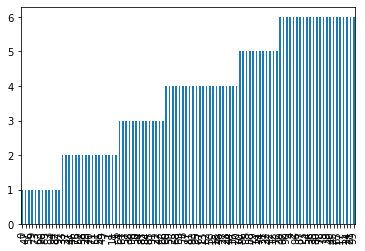

In [12]:
# your code here
diceHundred = pd.read_csv('../data/roll_the_dice_hundred.csv').sort_values(by='value')
diceHundred = diceHundred.drop('Unnamed: 0', axis=1)
diceHundred['value'].plot(x='value',y='roll', kind='bar')

In [13]:
"""
We can se that it has 2 distributions, 1,3 and 5 look they have the same probability to appear 
meanwhile 2,4 and 6 have the same probability.
"""


'\nWe can se that it has 2 distributions, 1,3 and 5 look they have the same probability to appear \nmeanwhile 2,4 and 6 have the same probability.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here
calcMean(diceHundred.value)

3.74

In [15]:
diceHundred.describe()

,roll,value
count,100.000000,100.000000
mean,49.500000,3.740000
std,29.011492,1.703354
min,0.000000,1.000000
25%,24.750000,2.000000
50%,49.500000,4.000000
75%,74.250000,5.000000
max,99.000000,6.000000


#### 3.- Now, calculate the frequency distribution.


In [16]:
# your code here
dfFreq = pd.DataFrame(diceHundred['value'].value_counts())
dfFreq.columns=['Frequency']
dfFreq

,Frequency
6,23
4,22
2,17
3,14
5,12
1,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

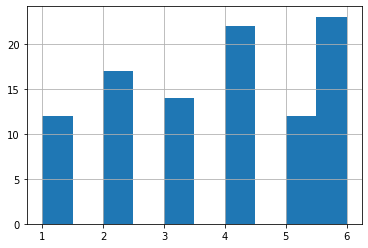

In [17]:
# your code here
diceHundred['value'].hist()

In [18]:
"""
With the histogram We see that the number 4 and 6 have the higher probability to appear 
while 5 and 1 are equally distribuited
and 2 and 3 the same """

'\nWith the histogram We see that the number 4 and 6 have the higher probability to appear \nwhile 5 and 1 are equally distribuited\nand 2 and 3 the same '

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

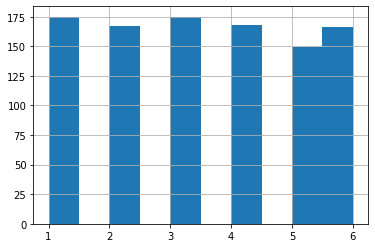

In [19]:
# your code here
diceThousand = pd.read_csv('../data/roll_the_dice_thousand.csv').sort_values(by='value')
diceThousand['value'].hist()

In [20]:
"""
With more samples we return to the original formula of distribution 1/6 per number."""

'\nWith more samples we return to the original formula of distribution 1/6 per number.'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [21]:
# your code here
agePop = pd.read_csv('../data/ages_population.csv')
agePop

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [22]:
dfFreq = pd.DataFrame(agePop['observation'].value_counts())
dfFreq.columns=['Frequency']
dfFreq.sort_values(by='Frequency', ascending = False)

,Frequency
39.0,45
41.0,36
30.0,34
35.0,33
43.0,32
...,...
70.0,1
71.0,1
7.0,1
69.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c386590>]],
      dtype=object)

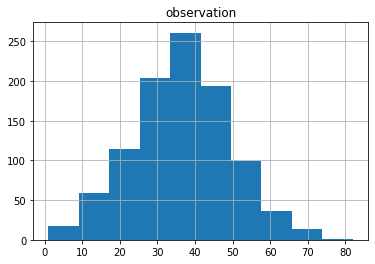

In [23]:
agePop.hist()

In [24]:
'''My guess about the mean range is between 35 and 41, and the standard deviation around 10 years. '''

'My guess about the mean range is between 35 and 41, and the standard deviation around 10 years. '

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [25]:
# your code here
print(f'Mean: {agePop.mean().values[0]}\nStd: {round(agePop.std().values[0], 2)}')

Mean: 36.56
Std: 12.82


In [26]:
"""
With the Histogram I can determine the range much easier and the results were inside the ranges I thought :)
"""

'\nWith the Histogram I can determine the range much easier and the results were inside the ranges I thought :)\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [27]:
# your code here
agesPop2 = pd.read_csv('../data/ages_population2.csv')
ages, counts = np.unique(agesPop2, return_counts=True)
df = pd.DataFrame(list(zip(ages,counts)),columns=['ages','counts'])

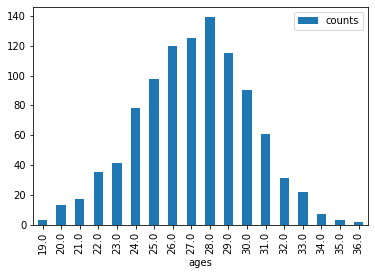

In [28]:
df.plot(x='ages',y='counts',kind='bar')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [29]:
"""
We can see the distribution is a normal distribution like the next image shows"""

'\nWe can see the distribution is a normal distribution like the next image shows'

![Normal Distribution](https://getnave.com/blog/wp-content/uploads/2018/08/frequency-distribution-types-normal-distribution.png)

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [30]:
# your code here
print(f'Mean: {agesPop2.mean()[0]}, Std: {agesPop2.std()[0]}')

Mean: 27.155, Std: 2.9698139326891835


In [31]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

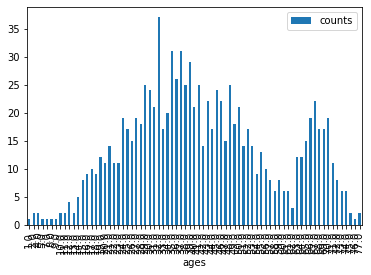

In [32]:
# your code here
ageDf = pd.read_csv('../data/ages_population3.csv')
ages, counts = np.unique(ageDf, return_counts=True)
df = pd.DataFrame(list(zip(ages,counts)),columns=['ages','counts'])
df.plot(x='ages',y='counts',kind='bar')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [33]:
# your code here
print(f'Mean: {ageDf.mean()[0]}, Std: {ageDf.std()[0]}')

Mean: 41.989, Std: 16.14470595986593


In [34]:
"""
We can see the distribution is skew it to the left, but on the right side is not distributed equal."""

'\nWe can see the distribution is skew it to the left, but on the right side is not distributed equal.'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [39]:
# your code here
print(q1(ageDf['observation']))
print(q2(ageDf['observation']))
print(q3(ageDf['observation']))

30.0
40.0
53.0


In [40]:
"""
The mean near to the first or third quartile says it's frecuency is skew to it's side, so we can see that the mean is near the quartile 2, meaning that the distribution is normal."""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [42]:
# your code here
print(f"Quartile 10% is: {ageDf['observation'].quantile(0.10)}")
print(f"Quartile 20% is: {ageDf['observation'].quantile(0.20)}")
print(f"Quartile 80% is: {ageDf['observation'].quantile(0.80)}")
print(f"Quartile 90% is: {ageDf['observation'].quantile(0.90)}")

Quartile 10% is: 22.0
Quartile 20% is: 28.0
Quartile 80% is: 57.0
Quartile 90% is: 67.0


In [43]:
"""
This quartiles don't give more information than we had before,
we see the data is spread on the right side while the distribution we can say is normal"""

"\nThis quartiles don't give more information than we had before,\nwe see the data is spread on the right side while the distribution we can say is normal"

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""